<a href="https://colab.research.google.com/github/Priyagane/UCI-Bank-Project/blob/main/BPI_bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/content/portu_banking_final.csv')# Loading the dataset
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
dataset.y.unique() # y coloumn has the client subscribed a term deposit? (binary: 'yes','no')


array([0, 1])

In [ ]:
dataset['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
#ratio of the two classes

print((4640/4640),":",round((36548/4640),2))

1.0 : 7.88


Data is unbalanced.

Data Cleaning

In [ ]:
dataset.isna().sum() #checking null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [ ]:
dataset.info() #dtypes of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#Checking errors in age column
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
dataset['marital'].value_counts()


married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
dataset.shape

(41188, 21)

In [ ]:
dataset.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
#Checking errors in age column
dataset['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [ ]:
#Correcting errors in age column
dataset.replace(to_replace={'age':{'35-30':'33','30-35':'33','18-25':'21','30-32':'31','50-55':'53','45-50':'43','20-25':'23', '25-30':'28','20-40':'30', '35-40':'38','30-40':'35'}},inplace=True)
dataset['age'] = dataset['age'].astype(int) #converting to integer datatype
dataset['age'].unique() 

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [ ]:
#Checking errors in martial column
dataset['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [ ]:
#Correcting the errors in martial column
dataset.loc[dataset['marital']=='M','marital']='married'
dataset.loc[dataset['marital']=='D','marital']='divorced'
dataset.loc[dataset['marital']=='S','marital']='single'
dataset.loc[dataset['marital']=='unknown','marital']='married'

In [ ]:
#Checking errors in education column
dataset['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [ ]:
#Correcting the errors in education column
dataset.loc[dataset['education']=='basic-4y','education']='basic.4y'
dataset.loc[dataset['education']=='basic-6y','education']='basic.6y'
dataset.loc[dataset['education']=='basic-9y','education']='basic.9y'
dataset.loc[dataset['education']=='unknown','education']='university.degree'

In [ ]:
#Checking errors in default column
dataset['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
#Correcting the errors in default column
dataset.loc[dataset['default']=='unknown','default']='no'

In [ ]:
#Checking errors in housing column
dataset['housing'].value_counts()   

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
#Correcting the errors in housing column
dataset.loc[dataset['housing']=='unknown','housing']='yes'

In [ ]:
#Checking errors in loan column
dataset['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
#Correcting the errors in loan column
dataset.loc[dataset['loan']=='unknown','loan']='no'

In [ ]:
#Checking errors in job column
dataset['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [ ]:
#Correcting the errors in job column
dataset.loc[dataset['job']=='ADMIN.','job']='admin.'
dataset.loc[dataset['job']=='MANAGEMENT','job']='management'
dataset.loc[dataset['job']=='RETIRED','job']='retired'
dataset.loc[dataset['job']=='TECHNICIAN','job']='technician'
dataset.loc[dataset['job']=='SERVICES','job']='services'
dataset.loc[dataset['job']=='STUDENT','job']='student'
dataset.loc[dataset['job']=='unknown','job']='admin.'
dataset.loc[dataset['job']=='UNKNOWN','job']='admin.'
dataset.loc[dataset['job']=='HOUSEMAID','job']='housemaid'
dataset.loc[dataset['job']=='BLUE-COLLAR','job']='blue-collar'
dataset.loc[dataset['job']=='unknown','job']='admin.'
dataset.loc[dataset['job']=='UNKNOWN','job']='admin.'

In [ ]:
dataset['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
dataset['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
dataset['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
dataset['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#Encoding the object datatype columns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
object_values = ['job' ,'marital','education','default','housing','loan','contact','month','poutcome','day_of_week'] 
dataset_1=dataset.copy()
for i in object_values:

  dataset_1[i]=lb.fit_transform(dataset_1[i])
  


In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
#correlation
dataset_corr = dataset_1.corr()
dataset_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.011917,-0.393347,-0.127772,0.001892,-0.001749,-0.007179,0.007045,-0.024827,-0.017545,...,0.004602,-0.032928,0.024380,0.019742,-0.000409,0.000839,0.129337,0.010734,-0.017758,0.030414
job,-0.011917,1.000000,0.025462,0.131869,0.013698,0.007516,-0.011832,-0.031929,-0.033206,-0.004111,...,-0.007736,-0.026782,0.022154,0.006660,-0.012738,-0.022366,0.044282,-0.012672,-0.021848,0.025482
marital,-0.393347,0.025462,1.000000,0.111405,-0.002388,0.011312,0.006483,-0.054610,-0.008824,0.002473,...,-0.008745,-0.029326,0.037703,0.002463,-0.083709,-0.056822,-0.033639,-0.091604,-0.086099,0.045849
education,-0.127772,0.131869,0.111405,1.000000,0.002576,0.016465,0.009242,-0.110515,-0.084505,-0.016828,...,0.000172,-0.041129,0.037680,0.016786,-0.044648,-0.086668,0.078166,-0.036762,-0.040502,0.057268
default,0.001892,0.013698,-0.002388,0.002576,1.000000,-0.003679,-0.003609,-0.006474,-0.004528,0.006079,...,-0.003803,0.001428,0.002766,-0.006196,0.004445,-0.003141,0.004492,0.005274,0.005941,-0.003041
housing,-0.001749,0.007516,0.011312,0.016465,-0.003679,1.000000,0.036425,-0.077937,-0.017006,0.003348,...,-0.010959,-0.010474,0.021677,-0.012591,-0.059100,-0.077170,-0.032388,-0.058233,-0.045590,0.011085
loan,-0.007179,-0.011832,0.006483,0.009242,-0.003609,0.036425,1.000000,-0.013367,-0.007073,-0.009483,...,0.005294,0.000619,-0.002143,-0.000237,0.001193,-0.005944,-0.013673,-0.000487,0.004205,-0.004466
contact,0.007045,-0.031929,-0.054610,-0.110515,-0.006474,-0.077937,-0.013367,1.000000,0.276565,-0.009575,...,0.077368,0.102350,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024827,-0.033206,-0.008824,-0.084505,-0.004528,-0.017006,-0.007073,0.276565,1.000000,0.027677,...,-0.062059,-0.047230,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017545,-0.004111,0.002473,-0.016828,0.006079,0.003348,-0.009483,-0.009575,0.027677,1.000000,...,-0.038288,-0.009167,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


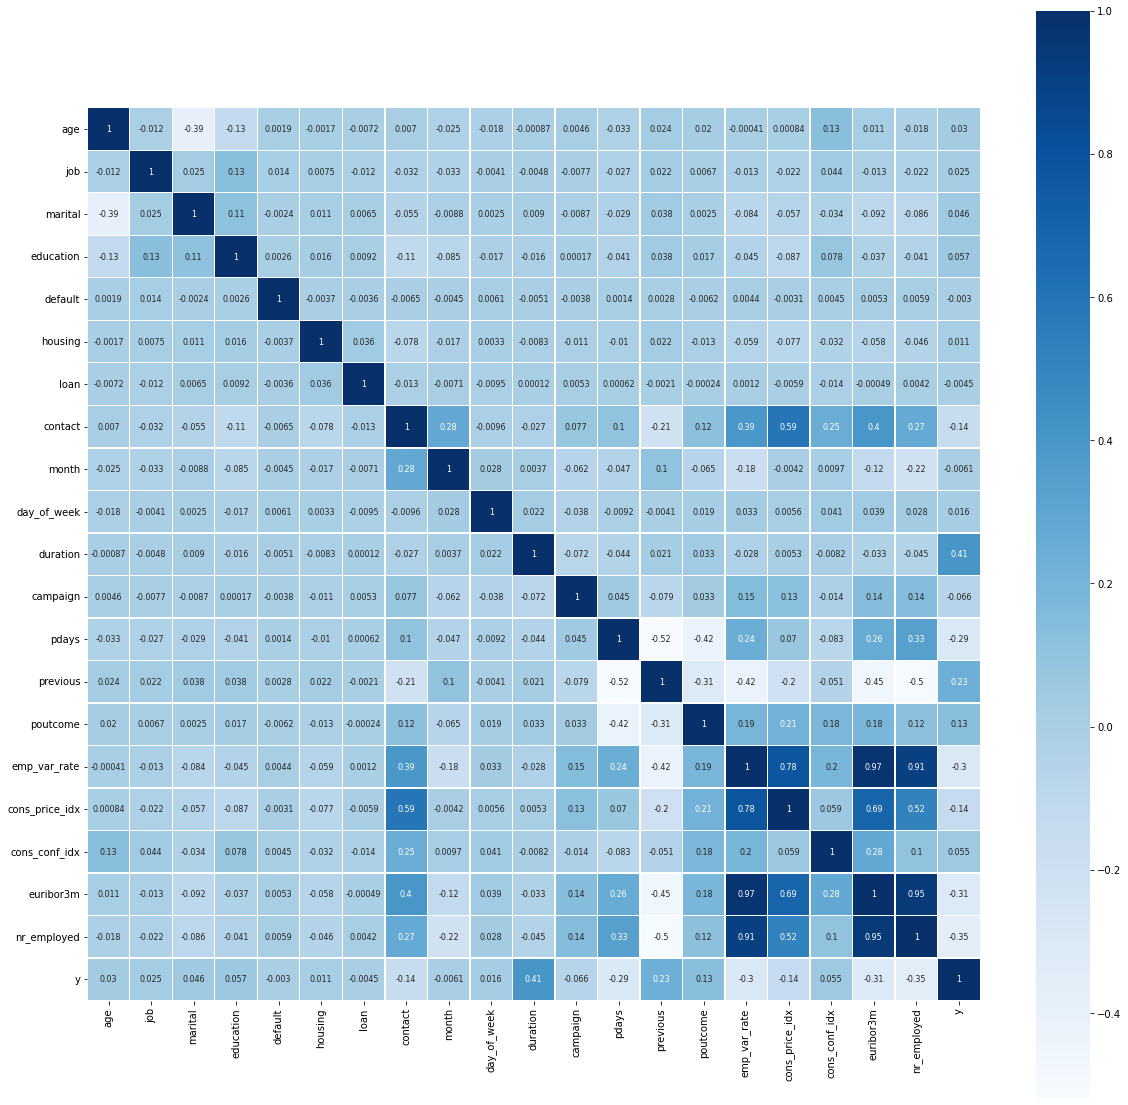

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap((dataset_corr),cmap='Blues', linewidth=0.2,annot=True,annot_kws={'size':8},square=True)

Exploring data with Group by 
I : y
II : job
III : marital
IV : education

In [ ]:
dataset_1.groupby('y').mean()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,,,,,,,,,,
0,39.910665,3.604219,1.159024,3.662690,0.000082,0.545912,0.152266,0.390090,4.235882,1.996662,220.844807,2.633085,985.345135,0.132374,0.913319,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,3.890302,1.246552,4.039655,0.000000,0.563362,0.147198,0.169612,4.191379,2.067241,553.191164,2.051724,792.035560,0.492672,1.062284,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
dataset_1.groupby('job').mean()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,,,,,,,,,,
0,38.413411,1.247024,4.676153,0.000000,0.554594,0.164342,0.321615,4.049758,1.992467,253.862909,2.624256,955.514788,0.187965,0.938430,0.026070,93.539728,-40.201004,3.562512,5164.395638,0.129185
1,39.555219,1.118543,1.825265,0.000000,0.534904,0.147612,0.449968,4.511563,2.032635,264.542360,2.558461,987.105468,0.122542,0.917117,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
2,41.723214,1.016484,4.037088,0.000000,0.559753,0.141484,0.412775,4.662088,1.968407,263.267857,2.535714,987.448489,0.138736,0.911401,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
3,45.500000,0.960377,2.049057,0.000000,0.536792,0.145283,0.396226,3.928302,2.069811,250.454717,2.639623,960.579245,0.137736,0.966038,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
4,42.360465,1.058140,5.086183,0.000000,0.533858,0.150137,0.349521,4.582421,2.016758,257.058140,2.476060,962.647059,0.185021,0.919289,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
5,62.027326,0.851744,2.737209,0.000000,0.544186,0.139535,0.284302,4.035465,2.030814,273.712209,2.476744,897.936047,0.327326,0.958140,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
6,39.944405,1.173118,4.528501,0.000000,0.548909,0.137227,0.371569,4.269529,1.907811,264.142153,2.660802,976.621393,0.143561,0.919071,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
7,37.926682,1.152431,3.042580,0.000000,0.541950,0.151424,0.417737,4.463341,1.994961,258.398085,2.587805,979.974049,0.154951,0.904762,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
8,25.894857,1.931429,4.021714,0.000000,0.564571,0.162286,0.233143,4.245714,2.005714,283.683429,2.104000,840.217143,0.524571,0.948571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [ ]:
dataset_1.groupby('marital').count()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,,,,,,,,,,
0,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
1,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008,25008
2,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568


In [ ]:
dataset_1.groupby('education').mean()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,,,,,,,,,
0,47.596504,2.569684,0.991379,0.000000,0.531849,0.149425,0.437261,4.289990,2.062021,264.827826,2.600575,970.015326,0.147031,0.945402,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
1,40.447644,2.387871,1.067627,0.000000,0.533159,0.143979,0.455934,4.594241,2.084206,264.414485,2.556283,980.368237,0.129145,0.922339,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
2,39.062035,2.623325,1.124235,0.000000,0.546237,0.146071,0.428950,4.558644,2.004467,261.291811,2.532341,979.133168,0.141439,0.914144,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
3,37.998108,3.912244,1.205675,0.000105,0.541461,0.151655,0.376984,4.386442,1.991697,260.886810,2.568576,964.358382,0.185917,0.913295,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
4,48.500000,2.666667,0.944444,0.000000,0.555556,0.166667,0.166667,3.277778,2.000000,276.777778,2.277778,943.833333,0.111111,1.000000,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
5,40.079916,6.988175,1.146290,0.000381,0.565134,0.151249,0.336639,4.007248,2.011825,252.533855,2.586115,962.482548,0.163075,0.938966,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
6,39.450968,3.151594,1.241960,0.000000,0.553709,0.156270,0.303979,3.989711,1.980430,254.365062,2.567595,951.984747,0.196633,0.941794,-0.017231,93.514034,-39.963602,3.534824,5162.768386,0.138211


Exploratory Data Analysis

Text(0, 0.5, 'Propotion of  customers')

<Figure size 1152x1152 with 0 Axes>

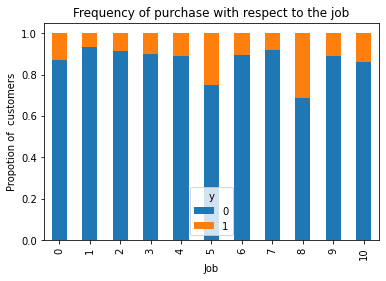

In [ ]:
plt.figure(figsize=(16,16))

job = pd.crosstab(dataset_1.job,dataset.y)
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of purchase with respect to the job')
plt.xlabel('Job')
plt.ylabel('Propotion of  customers')

Text(0, 0.5, 'Propotion of  customers')

<Figure size 1152x1152 with 0 Axes>

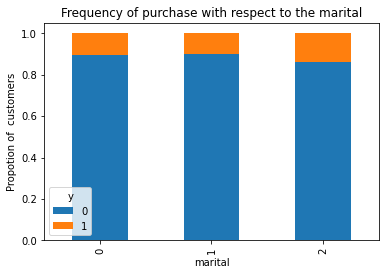

In [ ]:
plt.figure(figsize=(16,16))

marital= pd.crosstab(dataset_1.marital,dataset.y)
marital.div(marital.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of purchase with respect to the marital')
plt.xlabel('marital')
plt.ylabel('Propotion of  customers')

Text(0, 0.5, 'Propotion of  customers')

<Figure size 1152x1152 with 0 Axes>

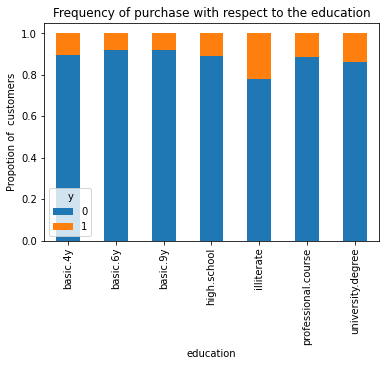

In [ ]:
plt.figure(figsize=(16,16))
education = pd.crosstab(dataset.education,dataset_1.y)
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of purchase with respect to the education')
plt.xlabel('education')
plt.ylabel('Propotion of  customers')


(array([5.000e+00, 2.800e+01, 4.200e+01, 6.500e+01, 1.030e+02, 1.370e+02,
        2.270e+02, 0.000e+00, 4.620e+02, 5.970e+02, 6.980e+02, 8.510e+02,
        1.002e+03, 1.452e+03, 0.000e+00, 1.713e+03, 1.948e+03, 1.844e+03,
        1.836e+03, 1.744e+03, 1.760e+03, 0.000e+00, 1.780e+03, 1.475e+03,
        1.408e+03, 1.432e+03, 1.159e+03, 1.278e+03, 0.000e+00, 1.142e+03,
        1.056e+03, 1.011e+03, 1.103e+03, 1.030e+03, 9.280e+02, 9.790e+02,
        0.000e+00, 8.390e+02, 8.740e+02, 7.540e+02, 7.790e+02, 7.340e+02,
        6.830e+02, 0.000e+00, 6.480e+02, 7.040e+02, 6.460e+02, 5.760e+02,
        4.630e+02, 2.830e+02, 0.000e+00, 7.300e+01, 6.200e+01, 5.500e+01,
        5.700e+01, 4.400e+01, 5.700e+01, 0.000e+00, 2.600e+01, 3.300e+01,
        3.400e+01, 4.700e+01, 5.300e+01, 3.400e+01, 3.400e+01, 0.000e+00,
        3.200e+01, 2.400e+01, 3.400e+01, 2.000e+01, 2.700e+01, 1.400e+01,
        0.000e+00, 3.100e+01, 2.000e+01, 1.700e+01, 1.700e+01, 7.000e+00,
        1.500e+01, 0.000e+00, 8.000e+0

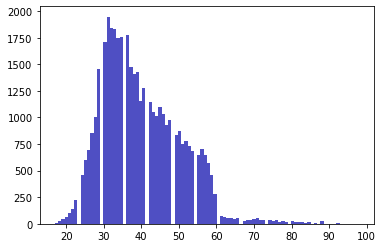

In [ ]:
plt.hist(dataset_1.age,bins='auto', color='#0504aa',alpha=0.7)

Categorical Variable Encoding

In [ ]:
#dummy variables of categorial variables
data_dum = ['job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week']

for i in data_dum: 
    Y1 = pd.get_dummies(dataset[['job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week']],drop_first=True)
Y1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
41184,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
41185,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
41186,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
value_Y = [Y1.columns]

for i in value_Y:
    data_dumm = Y1[i]
data_dumm
data = dataset.copy()
data = pd.concat([data,data_dumm],axis=1)#creating the new dataset by adding dummy variables
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,1,0,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,...,0,1,0,0,1,0,0,0,0,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,0,1,0,1,0,0
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,0,0,1,0,0,0,0,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data2 = data.drop(['job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week'],axis=1)
data2.head()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,1,0,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,1,0,0,0,0,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,1,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,1,0,0,0,0,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,1,0,0,0,0


Preliminary Training

In [ ]:
Y= data2[['y']]
Y

,y
0,0
1,0
2,1
3,0
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [ ]:
X=data2.drop(['y'],axis=1)
X.head()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,1,0,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,1,0,0,0,0,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,1,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,1,0,0,0,0,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2 )

In [ ]:
#Train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(verbose=1)
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(verbose=1)

In [ ]:
#Test the model
from sklearn.metrics import classification_report
predictions = model.predict(x_test)
print(predictions)
print( classification_report(y_test, predictions) )

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7338
           1       0.68      0.45      0.54       900

    accuracy                           0.92      8238
   macro avg       0.81      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The accuracy of the Model 0.9166059723233795
Confusion matrix, without normalization
[[7147  191]
 [ 496  404]]
Normalized confusion matrix
[[0.97397111 0.02602889]
 [0.55111111 0.44888889]]


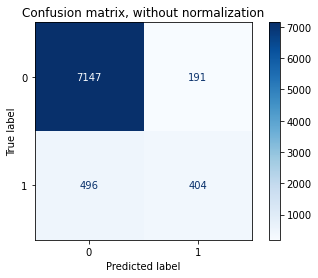

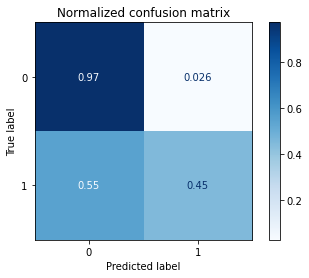

In [ ]:
#Scoring and Metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['0','1']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Prdication of test set:
Accuracy:0.92
recall 0:0.95
recall 1:0.54

To improve the performance:
Target feature ratio: 0: 29210, 1: 3740
Target features have a severe class imbalance which will create poor performance on the most important minority class.
To overcome this problem, SMOTE is used for Balancing Data.


In [ ]:
#ratio of the train_y
unique, count = np.unique(y_train,return_counts=True)
y_train_dic = {a:b for (a,b) in zip(unique,count)}
y_train_dic

{0: 29210, 1: 3740}

In [ ]:
#using SMOTE to improve the performance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_train_res, Y_train_res = sm.fit_resample(x_train,y_train)

In [ ]:
#'y' data ratio after prforming SOMTE
unique, count = np.unique(Y_train_res,return_counts=True)
y_train_dic = {a:b for (a,b) in zip(unique,count)}
y_train_dic

{0: 29210, 1: 29210}

After using the SMOTE ratio is: 0: 29210, 1: 29210

In [ ]:
#train the model after performing SOMTE
model.fit(X_train_res,Y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


LogisticRegression(verbose=1)

In [ ]:
#test the model after performing SOMTE
predictions1 = model.predict(x_test)
print(predictions1)
print( classification_report(y_test, predictions1) )

[0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7338
           1       0.40      0.83      0.54       900

    accuracy                           0.85      8238
   macro avg       0.69      0.84      0.72      8238
weighted avg       0.91      0.85      0.87      8238



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The accuracy of the Model 0.9166059723233795
Confusion matrix, without normalization
[[6220 1118]
 [ 153  747]]
Normalized confusion matrix
[[0.84764241 0.15235759]
 [0.17       0.83      ]]


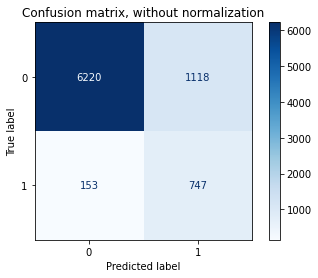

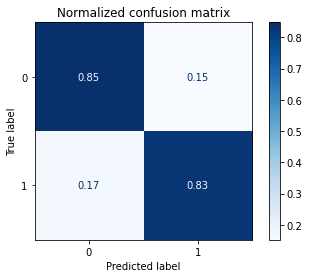

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print( "The accuracy of the Model",accuracy_score(y_test, predictions))

class_names = ['0','1']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Predication after using the SMOTE:
Accuracy:0.85
recall 0:0.85
recall 1:0.83

After using SMOTE the rcall score of 1 is improved.

To optimize the dataset:
choosing the best columns from dataset by using RFE or RFEEV.

In [ ]:
#using RFE to select the best columns.
from sklearn.feature_selection import RFE

model1 = RFE(estimator=model)
model1.fit(x_train,y_train)


In [ ]:
el1.fit_transform(x_train,y_train)
print(model1.support_)
print(model1.ranking_)

In [ ]:
from sklearn.feature_selection import RFECV
model2 = RFECV(estimator=model,step=1,verbose=1,cv=5)
model2.fit(x_train,y_train)

In [ ]:
model2.fit_transform(x_train,y_train)
print(model2)


In [ ]:
model2.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
x_train.columns[model2.support_]

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')

creating new dataset ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'] from the best features.

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,x_train,y_train,scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validati

In [ ]:
score

array([0.90804249, 0.90500759, 0.9091047 , 0.90743551, 0.91229135])

In [ ]:
data3 = data2[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]
data3.head()


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  float64
 4   previous        41188 non-null  int64  
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


In [ ]:
X1 = data3.copy()

Y1 = data2[['y']]


In [ ]:
from sklearn.model_selection import train_test_split
x_train_rfe, x_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X1,Y1,test_size=0.2 )
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 4094 to 649
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32950 non-null  int64  
 1   duration        32950 non-null  int64  
 2   campaign        32950 non-null  int64  
 3   pdays           32950 non-null  float64
 4   previous        32950 non-null  int64  
 5   emp_var_rate    32950 non-null  float64
 6   cons_price_idx  32950 non-null  float64
 7   cons_conf_idx   32950 non-null  float64
 8   euribor3m       32950 non-null  float64
 9   nr_employed     32950 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


Applying train model in the new dataset created from the best features.

In [ ]:
model.fit(x_train_rfe,y_train_rfe)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(verbose=1)

In [ ]:
predictions_rfe = model.predict(x_test_rfe)
print(predictions_rfe)
print( classification_report(y_test_rfe, predictions_rfe) )

[0 0 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7296
           1       0.69      0.40      0.50       942

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



The accuracy of the Model 0.910536537994659
Confusion matrix, without normalization
[[7126  170]
 [ 567  375]]
Normalized confusion matrix
[[0.97669956 0.02330044]
 [0.60191083 0.39808917]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


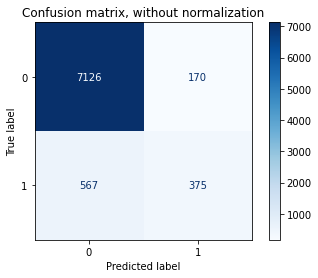

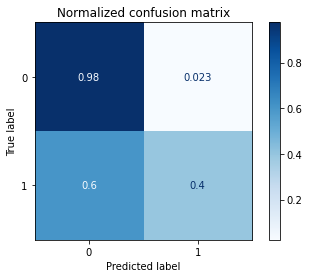

In [ ]:
print( "The accuracy of the Model",accuracy_score(y_test_rfe, predictions_rfe))

class_names = ['0','1']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test_rfe, y_test_rfe,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
unique, count = np.unique(y_train,return_counts=True)
y_train_dic = {a:b for (a,b) in zip(unique,count)}
y_train_dic

{0: 29244, 1: 3706}

Predication for new dataset: 
Accuracy :0.91
recall 0:0.98
recall 1:0.40

from the predication the recall score of 1 is less than 0 because of class bias 0: 29244, 1: 3706


To overcome the class bias using SMOTE on new dataset.

In [ ]:
X_train_rfe_sm, Y_train_rfe_sm = sm.fit_resample(x_train_rfe,y_train_rfe)

In [ ]:
unique, count = np.unique(Y_train_rfe_sm,return_counts=True)
y_train_dic = {a:b for (a,b) in zip(unique,count)}
y_train_dic

{0: 29252, 1: 29252}

After using SMOTE the ratio is 0: 29252, 1: 29252 equal.
Applying train model agian on new dataset where SMOTE is applied.

In [ ]:
model.fit(X_train_rfe_sm,Y_train_rfe_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(verbose=1)

In [ ]:
predictions1 = model.predict(x_test_rfe)
print(predictions1)
print( classification_report(y_test_rfe, predictions1) )

[0 0 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7296
           1       0.42      0.84      0.56       942

    accuracy                           0.85      8238
   macro avg       0.70      0.84      0.73      8238
weighted avg       0.91      0.85      0.87      8238



The accuracy of the Model 0.8345472201990775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[6206 1090]
 [ 155  787]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.85060307 0.14939693]
 [0.16454352 0.83545648]]


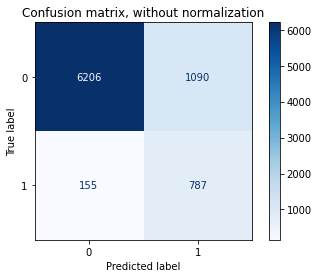

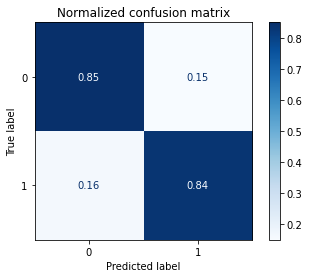

In [ ]:

print( "The accuracy of the Model",accuracy_score(y_test_rfe, predictions))

class_names = ['0','1']

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test_rfe, y_test_rfe,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


we can see the RFE that given 10 best features that achieves a 
Accuracy:0.85
recall 0:0.85
recall 1:0.84

We got relatively same accuracy as we got in whole dataset.